## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-07-Evolutionary-Algorithm-04

## Part A - Load the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part B - Setup the parameters

In [2]:
N_MOVES = 300
DNA_SIZE = N_MOVES*2
DIRECTION_BOUND = [0, 1]
CROSS_RATE = 0.8
MUTATE_RATE = 0.0001
POP_SIZE = 300
N_GENERATIONS = 300
GOAL_POINT = [10, 5]
START_POINT = [0, 5]
OBSTACLE_LINE = np.array([[5, 2], [5, 8]])

## Part C - Define GA Class

In [3]:
class GA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size, ):
        self.DNA_size = DNA_size
        DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.random.randint(*DNA_bound, size=(pop_size, DNA_size))

    def DNA2product(self, DNA, n_moves, start_point):                 # convert to readable string
        pop = (DNA - 0.5) / 2
        pop[:, 0], pop[:, n_moves] = start_point[0], start_point[1]
        lines_x = np.cumsum(pop[:, :n_moves], axis=1)
        lines_y = np.cumsum(pop[:, n_moves:], axis=1)
        return lines_x, lines_y

    def get_fitness(self, lines_x, lines_y, goal_point, obstacle_line):
        dist2goal = np.sqrt((goal_point[0] - lines_x[:, -1]) ** 2 + (goal_point[1] - lines_y[:, -1]) ** 2)
        fitness = np.power(1 / (dist2goal + 1), 2)
        points = (lines_x > obstacle_line[0, 0] - 0.5) & (lines_x < obstacle_line[1, 0] + 0.5)
        y_values = np.where(points, lines_y, np.zeros_like(lines_y) - 100)
        bad_lines = ((y_values > obstacle_line[0, 1]) & (y_values < obstacle_line[1, 1])).max(axis=1)
        fitness[bad_lines] = 1e-6
        return fitness

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness/fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)  # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[point] = np.random.randint(*self.DNA_bound)
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

## Part D - Define Line Class

In [4]:
class Line(object):
    def __init__(self, n_moves, goal_point, start_point, obstacle_line):
        self.n_moves = n_moves
        self.goal_point = goal_point
        self.start_point = start_point
        self.obstacle_line = obstacle_line

        plt.ion()

    def plotting(self, lines_x, lines_y):
        plt.cla()
        plt.scatter(*self.goal_point, s=200, c='r')
        plt.scatter(*self.start_point, s=100, c='b')
        plt.plot(self.obstacle_line[:, 0], self.obstacle_line[:, 1], lw=3, c='k')
        plt.plot(lines_x.T, lines_y.T, c='k')
        plt.xlim((-5, 15))
        plt.ylim((-5, 15))
        plt.pause(0.01)

## Part E - Create GA object

In [5]:
ga = GA(DNA_size=DNA_SIZE, DNA_bound=DIRECTION_BOUND,
        cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

## Part F - Create Enviroment

In [6]:
env = Line(N_MOVES, GOAL_POINT, START_POINT, OBSTACLE_LINE)

## Part G - Evolve through the generations

In [7]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Gen: 0 | best fit: 0.0879629982643065


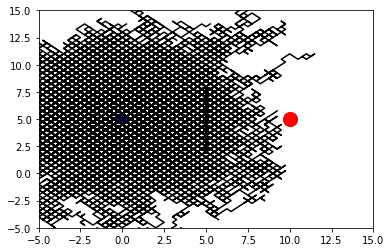

Gen: 1 | best fit: 0.545819714368591


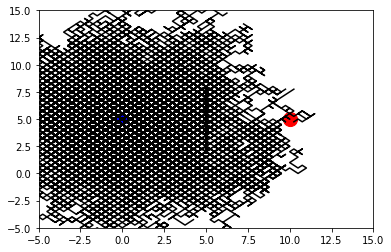

Gen: 2 | best fit: 0.545819714368591


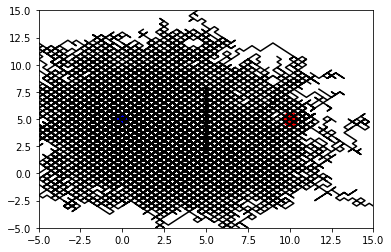

Gen: 3 | best fit: 0.545819714368591


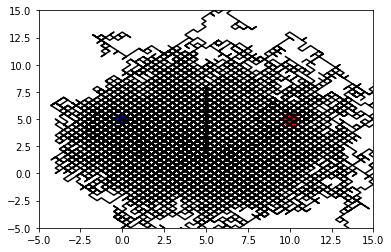

Gen: 4 | best fit: 0.545819714368591


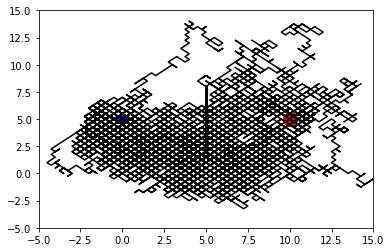

Gen: 5 | best fit: 0.545819714368591


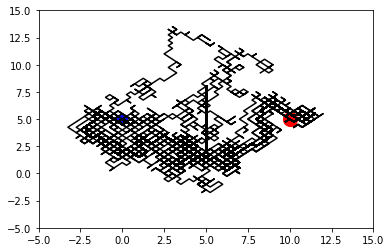

Gen: 6 | best fit: 0.545819714368591


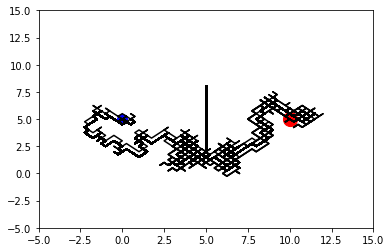

Gen: 7 | best fit: 0.545819714368591


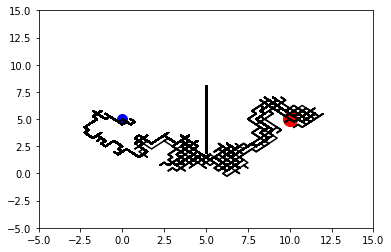

Gen: 8 | best fit: 0.545819714368591


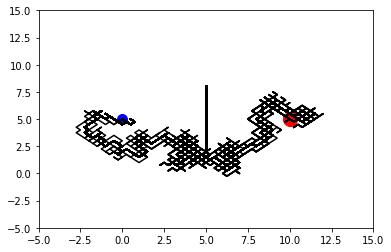

Gen: 9 | best fit: 0.545819714368591


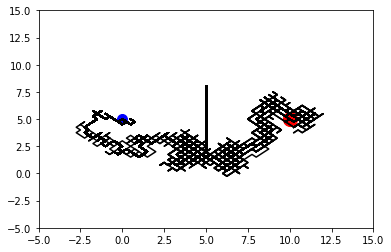

Gen: 10 | best fit: 0.545819714368591


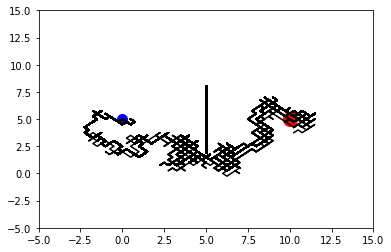

Gen: 11 | best fit: 0.545819714368591


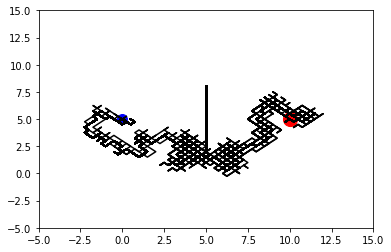

Gen: 12 | best fit: 0.545819714368591


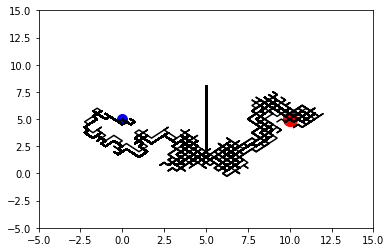

Gen: 13 | best fit: 0.545819714368591


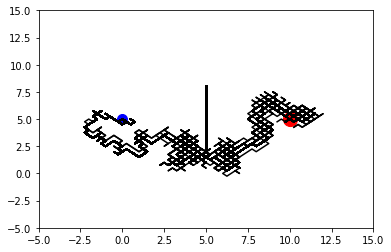

Gen: 14 | best fit: 0.545819714368591


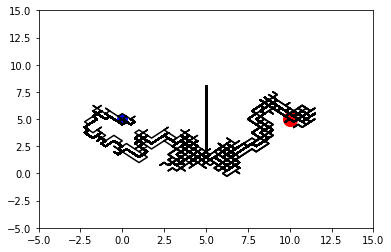

Gen: 15 | best fit: 0.545819714368591


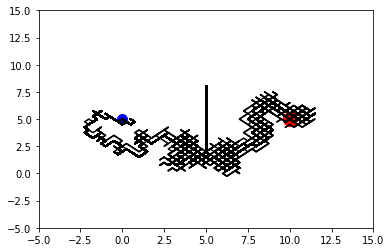

Gen: 16 | best fit: 0.545819714368591


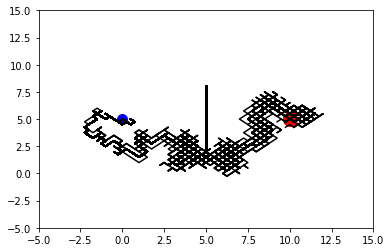

Gen: 17 | best fit: 0.545819714368591


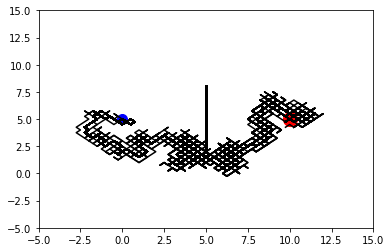

Gen: 18 | best fit: 0.545819714368591


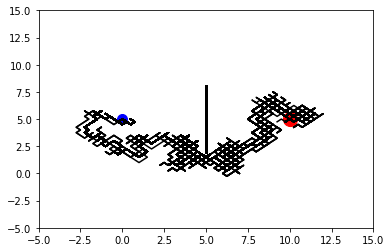

Gen: 19 | best fit: 0.545819714368591


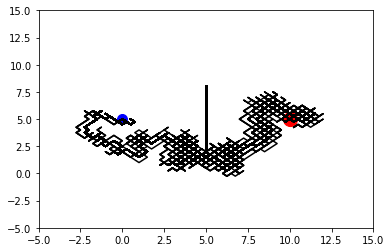

Gen: 20 | best fit: 0.545819714368591


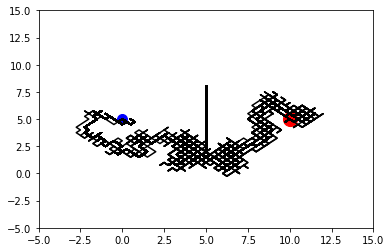

Gen: 21 | best fit: 0.545819714368591


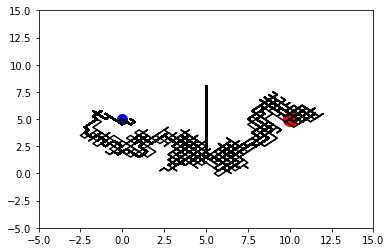

Gen: 22 | best fit: 0.545819714368591


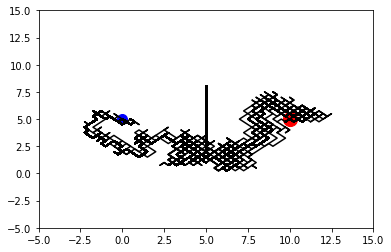

Gen: 23 | best fit: 0.545819714368591


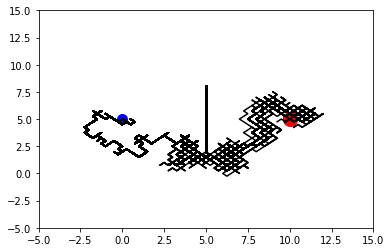

Gen: 24 | best fit: 0.545819714368591


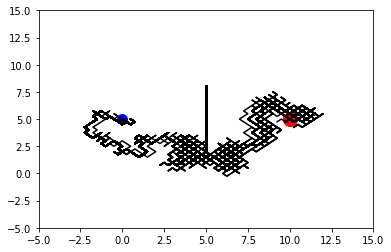

Gen: 25 | best fit: 0.545819714368591


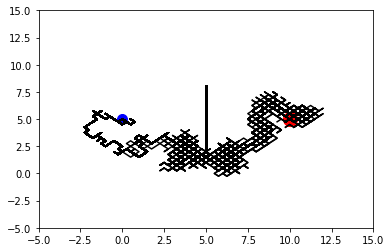

Gen: 26 | best fit: 0.545819714368591


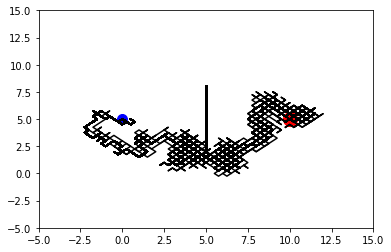

Gen: 27 | best fit: 0.545819714368591


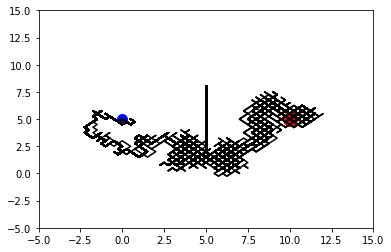

Gen: 28 | best fit: 0.545819714368591


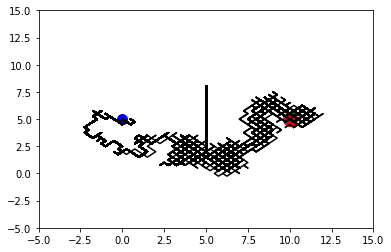

Gen: 29 | best fit: 0.545819714368591


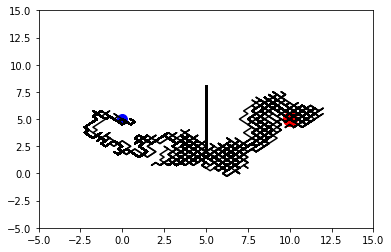

Gen: 30 | best fit: 0.545819714368591


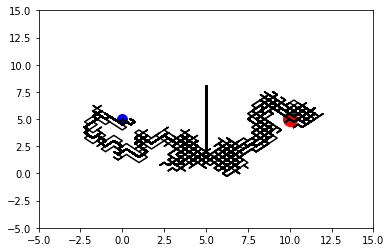

Gen: 31 | best fit: 0.545819714368591


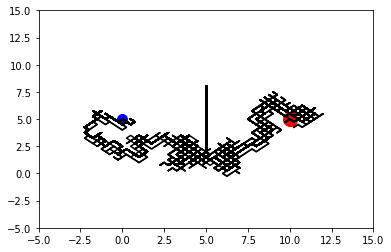

Gen: 32 | best fit: 0.545819714368591


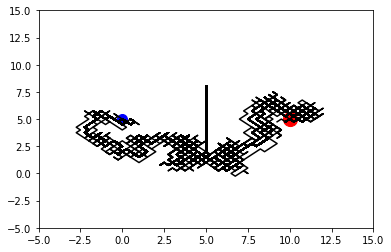

Gen: 33 | best fit: 0.545819714368591


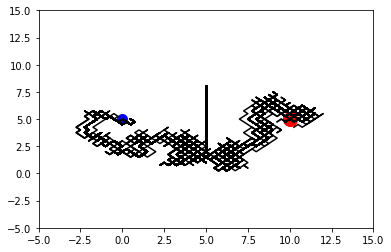

Gen: 34 | best fit: 0.545819714368591


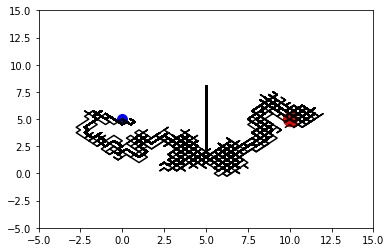

Gen: 35 | best fit: 0.545819714368591


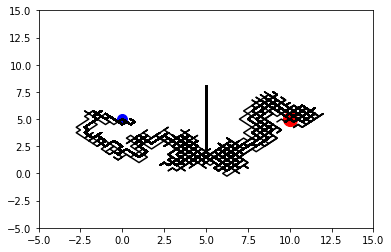

Gen: 36 | best fit: 0.545819714368591


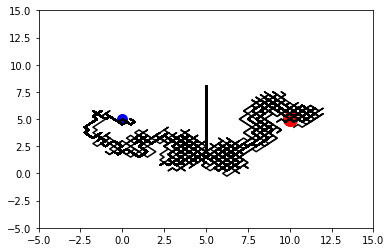

Gen: 37 | best fit: 0.545819714368591


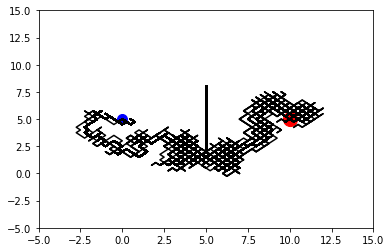

Gen: 38 | best fit: 0.545819714368591


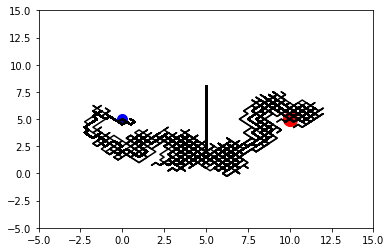

Gen: 39 | best fit: 0.545819714368591


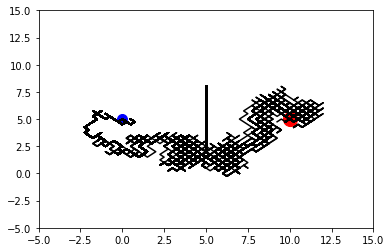

Gen: 40 | best fit: 0.545819714368591


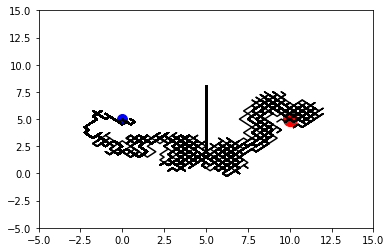

Gen: 41 | best fit: 0.545819714368591


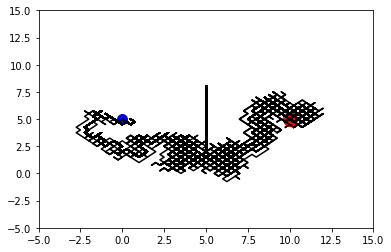

Gen: 42 | best fit: 0.545819714368591


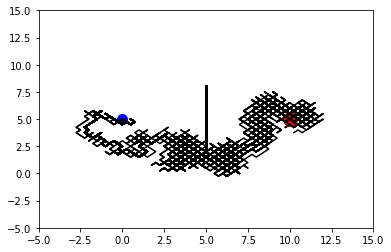

Gen: 43 | best fit: 0.545819714368591


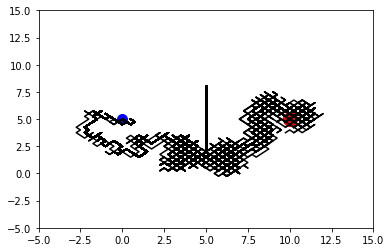

Gen: 44 | best fit: 0.545819714368591


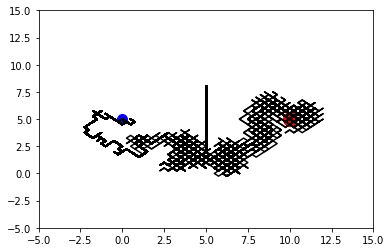

Gen: 45 | best fit: 0.545819714368591


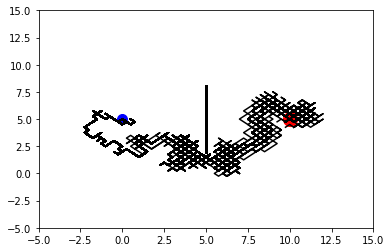

Gen: 46 | best fit: 0.545819714368591


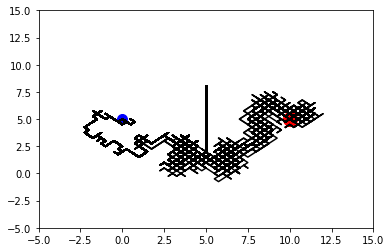

Gen: 47 | best fit: 0.545819714368591


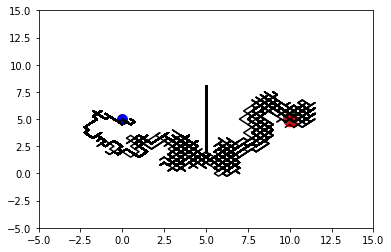

Gen: 48 | best fit: 0.545819714368591


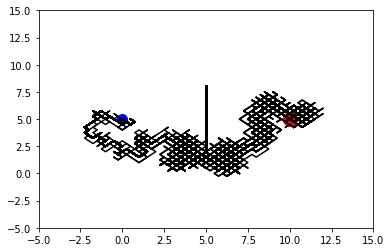

Gen: 49 | best fit: 0.545819714368591


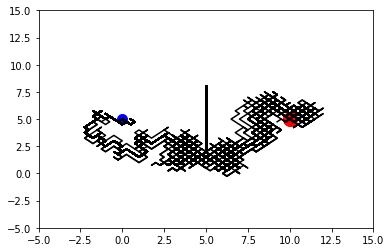

Gen: 50 | best fit: 0.545819714368591


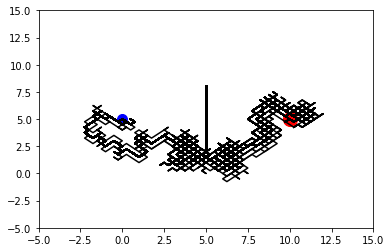

Gen: 51 | best fit: 0.545819714368591


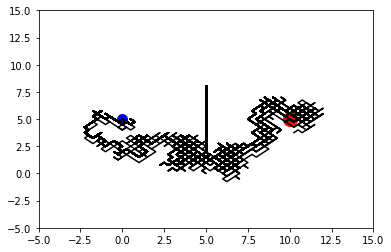

Gen: 52 | best fit: 0.545819714368591


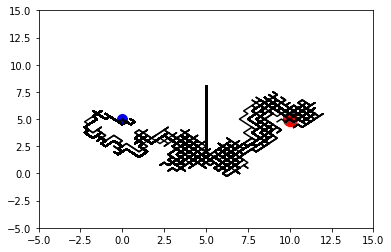

Gen: 53 | best fit: 0.545819714368591


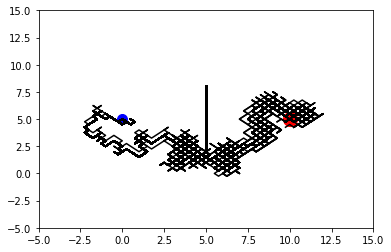

Gen: 54 | best fit: 0.545819714368591


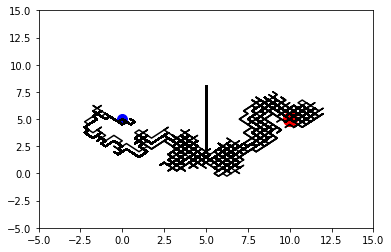

Gen: 55 | best fit: 0.545819714368591


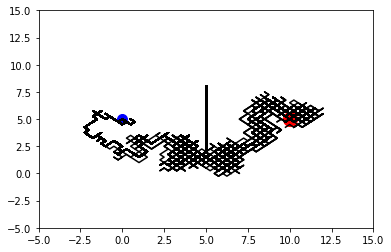

Gen: 56 | best fit: 0.545819714368591


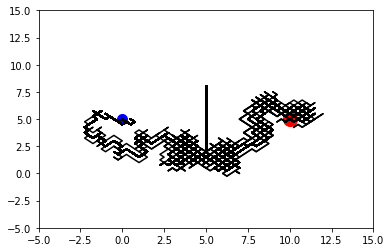

Gen: 57 | best fit: 0.545819714368591


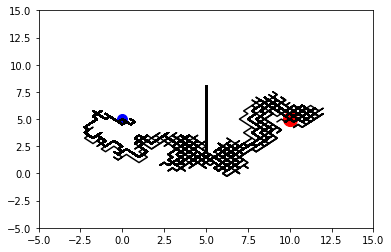

Gen: 58 | best fit: 0.545819714368591


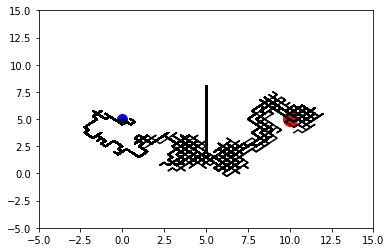

Gen: 59 | best fit: 0.545819714368591


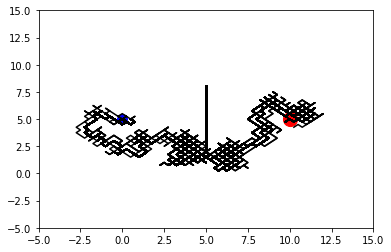

Gen: 60 | best fit: 0.545819714368591


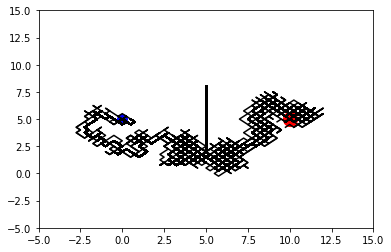

Gen: 61 | best fit: 0.545819714368591


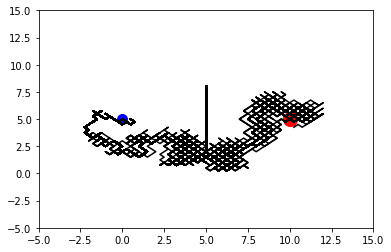

Gen: 62 | best fit: 0.545819714368591


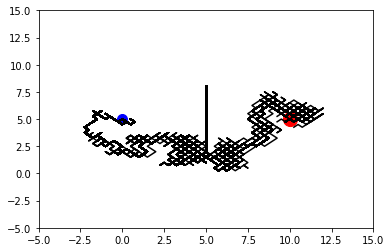

Gen: 63 | best fit: 0.545819714368591


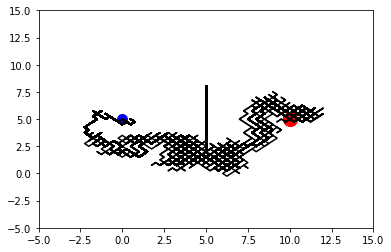

Gen: 64 | best fit: 0.545819714368591


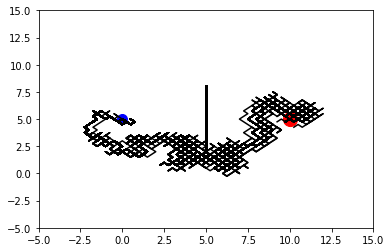

Gen: 65 | best fit: 0.545819714368591


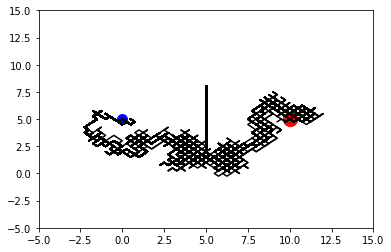

Gen: 66 | best fit: 0.545819714368591


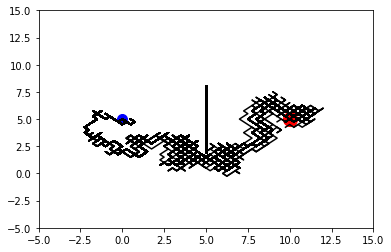

Gen: 67 | best fit: 0.545819714368591


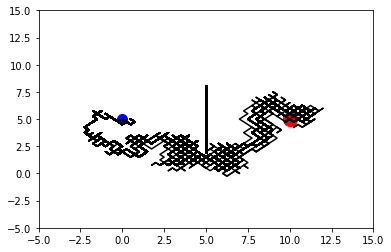

Gen: 68 | best fit: 0.545819714368591


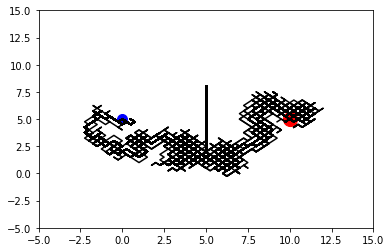

Gen: 69 | best fit: 0.545819714368591


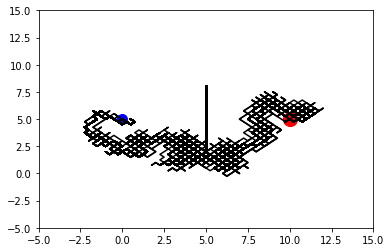

Gen: 70 | best fit: 0.545819714368591


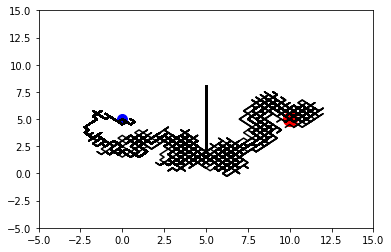

Gen: 71 | best fit: 0.545819714368591


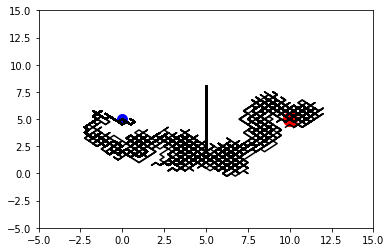

Gen: 72 | best fit: 0.545819714368591


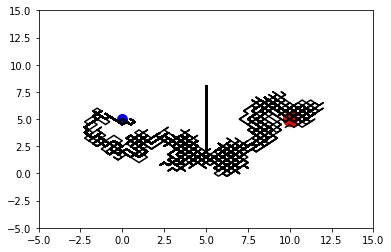

Gen: 73 | best fit: 0.545819714368591


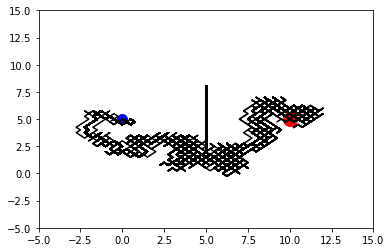

Gen: 74 | best fit: 0.545819714368591


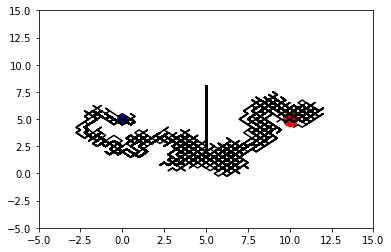

Gen: 75 | best fit: 0.545819714368591


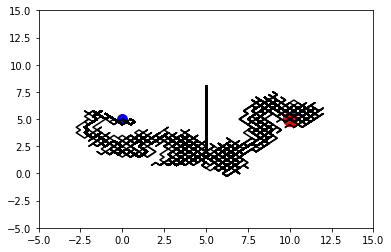

Gen: 76 | best fit: 0.545819714368591


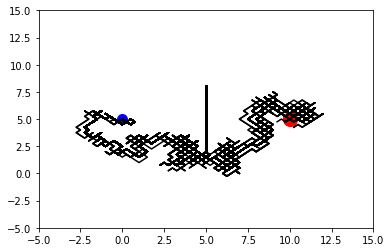

Gen: 77 | best fit: 0.545819714368591


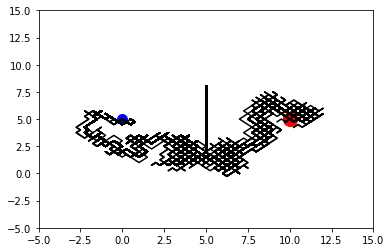

Gen: 78 | best fit: 0.545819714368591


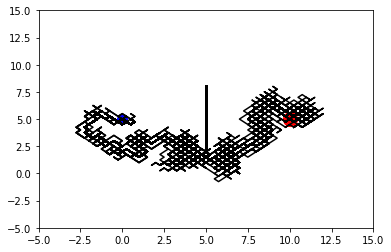

Gen: 79 | best fit: 0.545819714368591


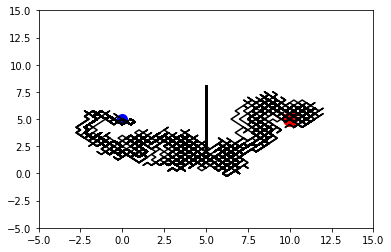

Gen: 80 | best fit: 0.545819714368591


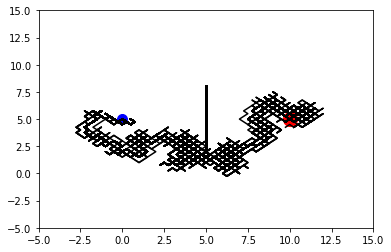

Gen: 81 | best fit: 0.545819714368591


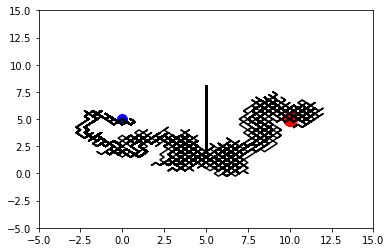

Gen: 82 | best fit: 0.545819714368591


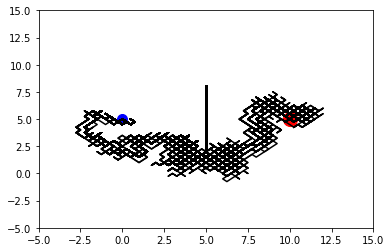

Gen: 83 | best fit: 0.545819714368591


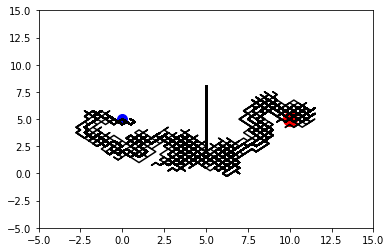

Gen: 84 | best fit: 0.545819714368591


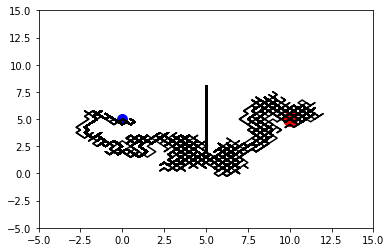

Gen: 85 | best fit: 0.545819714368591


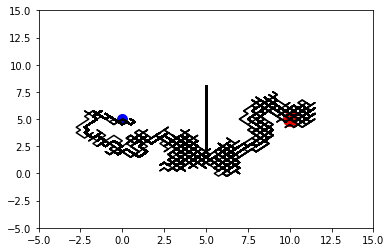

Gen: 86 | best fit: 0.545819714368591


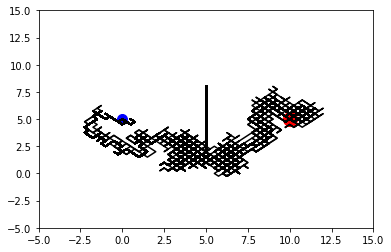

Gen: 87 | best fit: 0.545819714368591


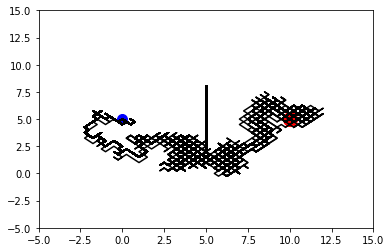

Gen: 88 | best fit: 0.545819714368591


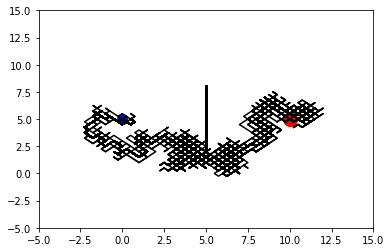

Gen: 89 | best fit: 0.545819714368591


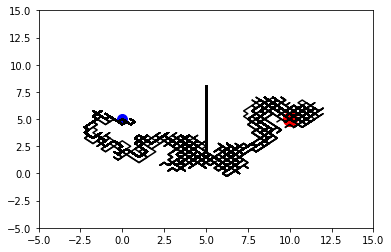

Gen: 90 | best fit: 0.545819714368591


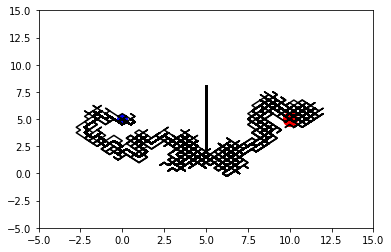

Gen: 91 | best fit: 0.545819714368591


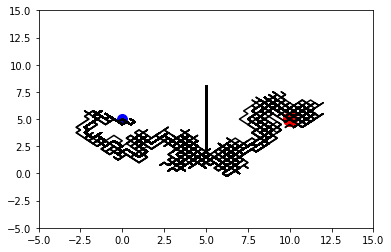

Gen: 92 | best fit: 0.545819714368591


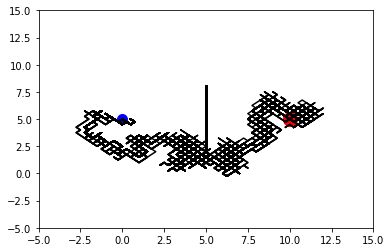

Gen: 93 | best fit: 0.545819714368591


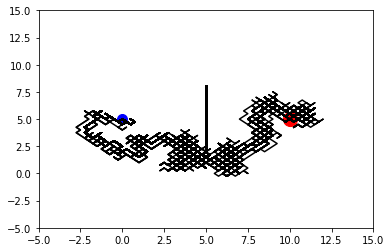

Gen: 94 | best fit: 0.545819714368591


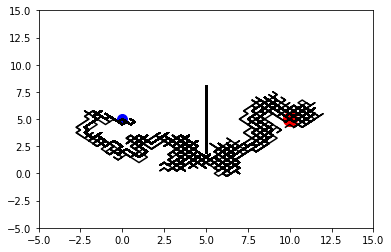

Gen: 95 | best fit: 0.545819714368591


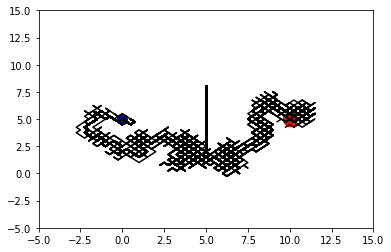

Gen: 96 | best fit: 0.545819714368591


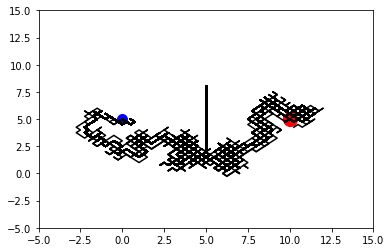

Gen: 97 | best fit: 0.545819714368591


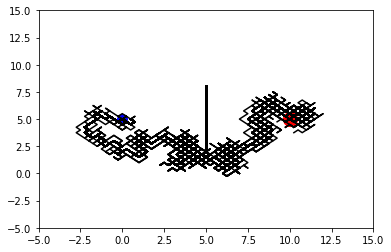

Gen: 98 | best fit: 0.545819714368591


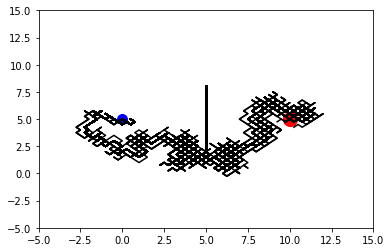

Gen: 99 | best fit: 0.545819714368591


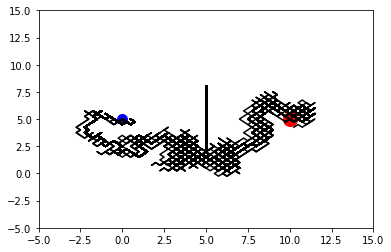

Gen: 100 | best fit: 0.545819714368591


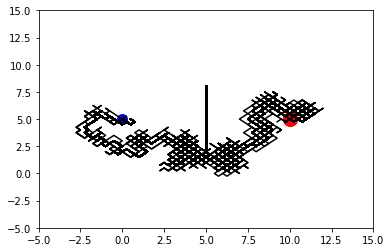

Gen: 101 | best fit: 0.545819714368591


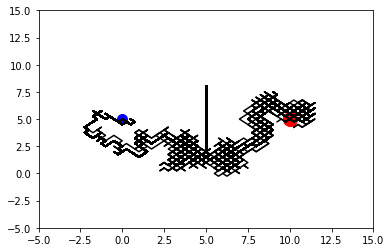

Gen: 102 | best fit: 0.545819714368591


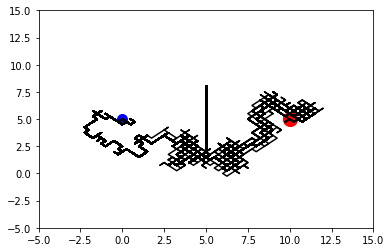

Gen: 103 | best fit: 0.545819714368591


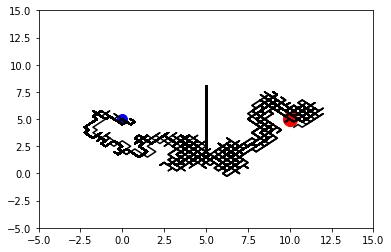

Gen: 104 | best fit: 0.545819714368591


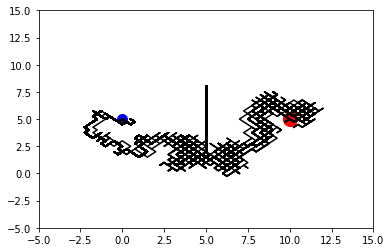

Gen: 105 | best fit: 0.545819714368591


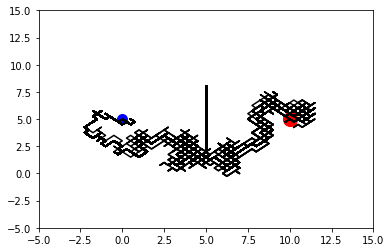

Gen: 106 | best fit: 0.545819714368591


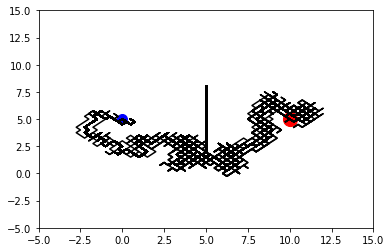

Gen: 107 | best fit: 0.545819714368591


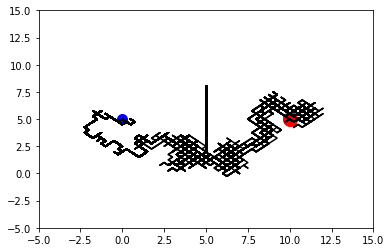

Gen: 108 | best fit: 0.545819714368591


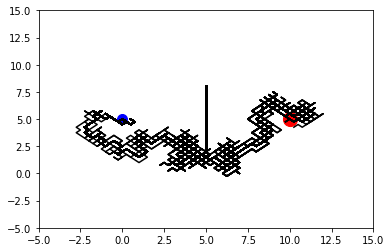

Gen: 109 | best fit: 0.545819714368591


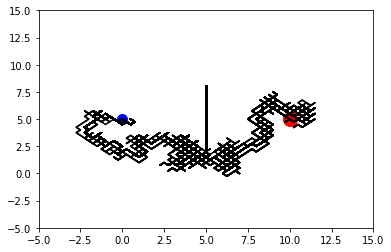

Gen: 110 | best fit: 0.545819714368591


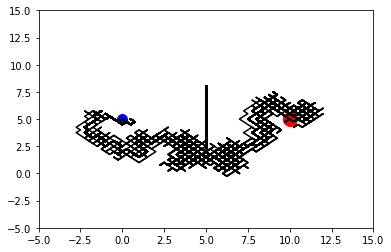

Gen: 111 | best fit: 0.545819714368591


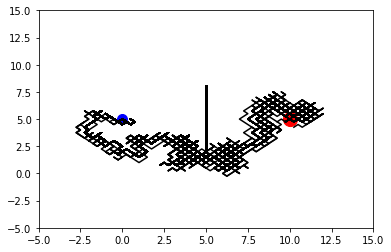

Gen: 112 | best fit: 0.545819714368591


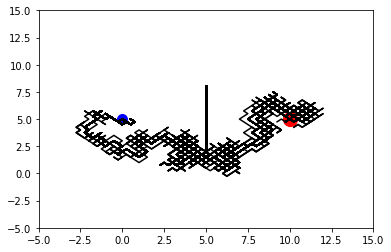

Gen: 113 | best fit: 0.545819714368591


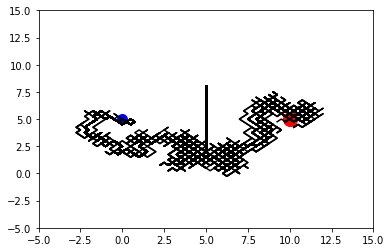

Gen: 114 | best fit: 0.545819714368591


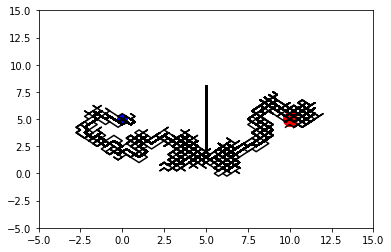

Gen: 115 | best fit: 0.545819714368591


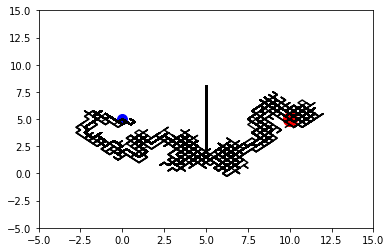

Gen: 116 | best fit: 0.545819714368591


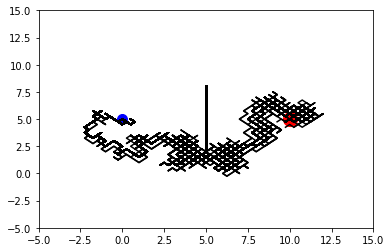

Gen: 117 | best fit: 0.545819714368591


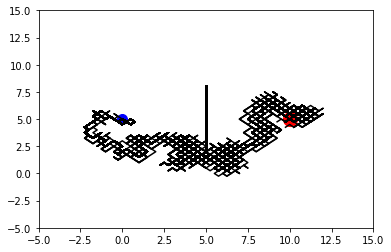

Gen: 118 | best fit: 0.545819714368591


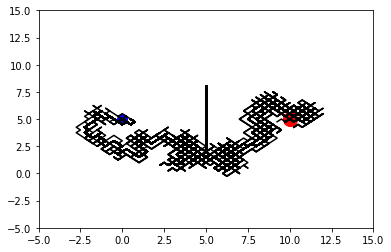

Gen: 119 | best fit: 0.545819714368591


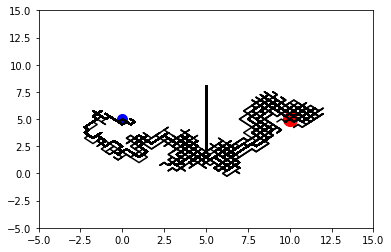

Gen: 120 | best fit: 0.545819714368591


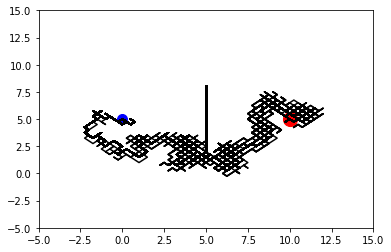

Gen: 121 | best fit: 0.545819714368591


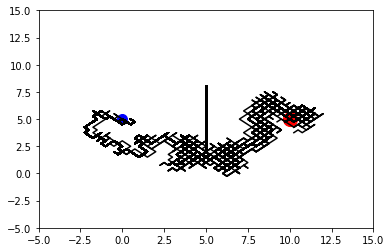

Gen: 122 | best fit: 0.545819714368591


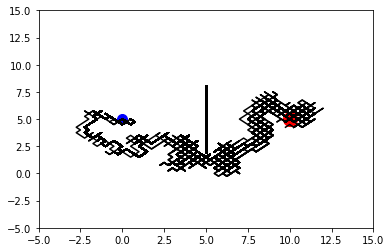

Gen: 123 | best fit: 0.545819714368591


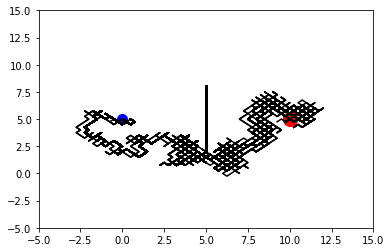

Gen: 124 | best fit: 0.545819714368591


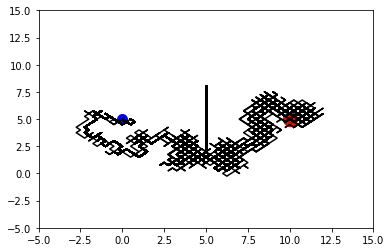

Gen: 125 | best fit: 0.545819714368591


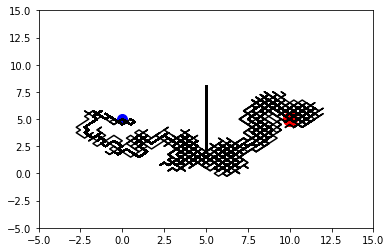

Gen: 126 | best fit: 0.545819714368591


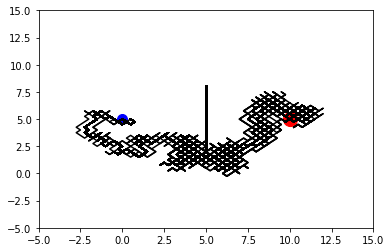

Gen: 127 | best fit: 0.545819714368591


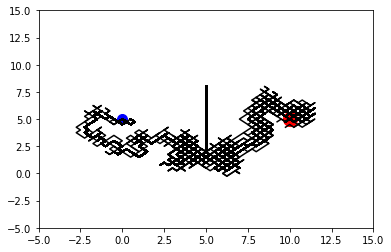

Gen: 128 | best fit: 0.545819714368591


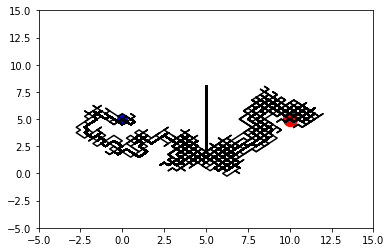

Gen: 129 | best fit: 0.545819714368591


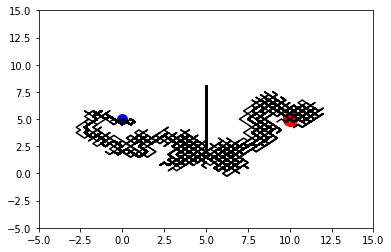

Gen: 130 | best fit: 0.545819714368591


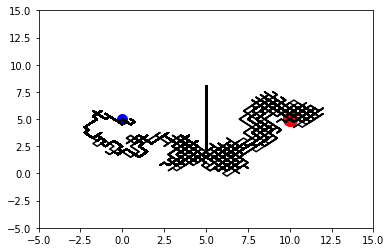

Gen: 131 | best fit: 0.545819714368591


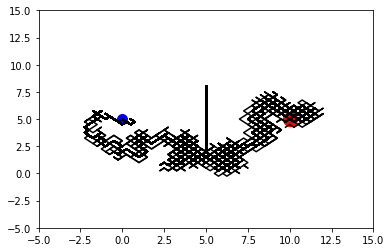

Gen: 132 | best fit: 0.545819714368591


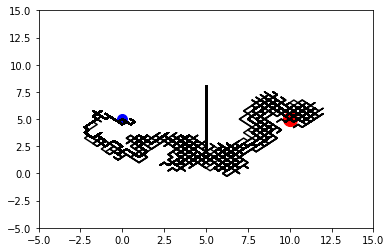

Gen: 133 | best fit: 0.545819714368591


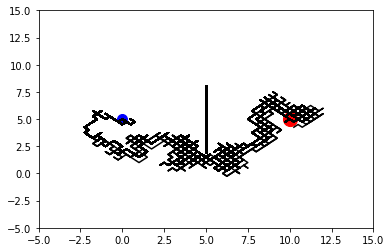

Gen: 134 | best fit: 0.545819714368591


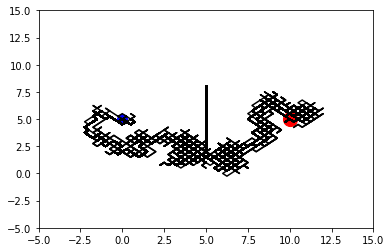

Gen: 135 | best fit: 0.545819714368591


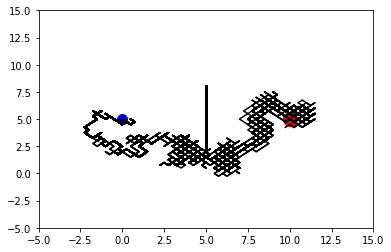

Gen: 136 | best fit: 0.545819714368591


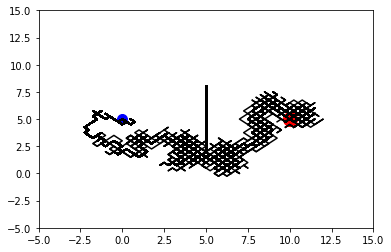

Gen: 137 | best fit: 0.545819714368591


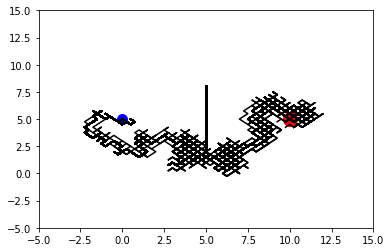

Gen: 138 | best fit: 0.545819714368591


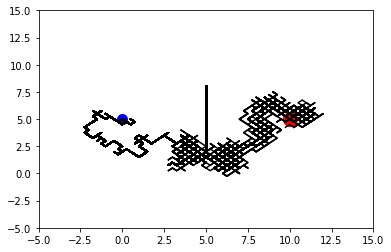

Gen: 139 | best fit: 0.545819714368591


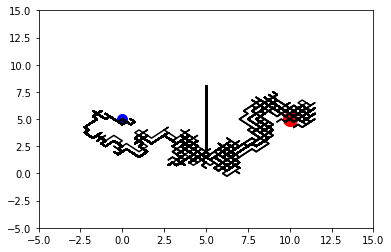

Gen: 140 | best fit: 0.545819714368591


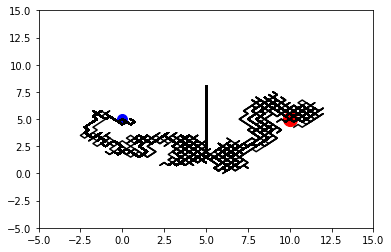

Gen: 141 | best fit: 0.545819714368591


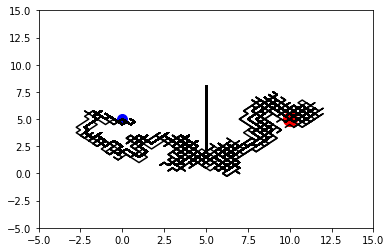

Gen: 142 | best fit: 0.545819714368591


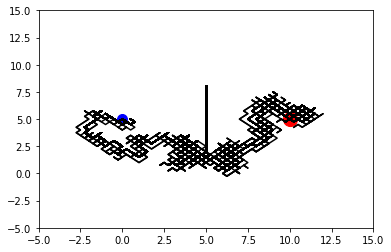

Gen: 143 | best fit: 0.545819714368591


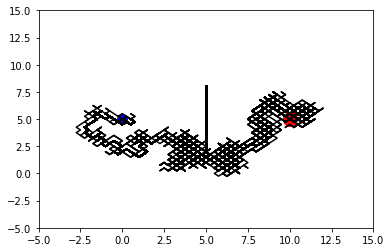

Gen: 144 | best fit: 0.545819714368591


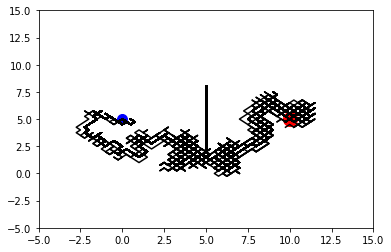

Gen: 145 | best fit: 0.545819714368591


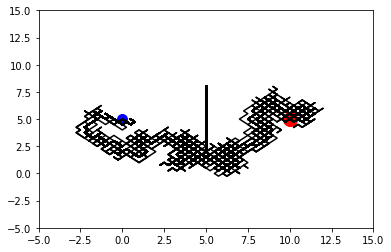

Gen: 146 | best fit: 0.545819714368591


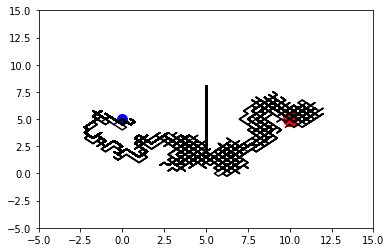

Gen: 147 | best fit: 0.545819714368591


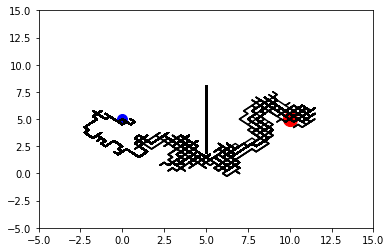

Gen: 148 | best fit: 0.545819714368591


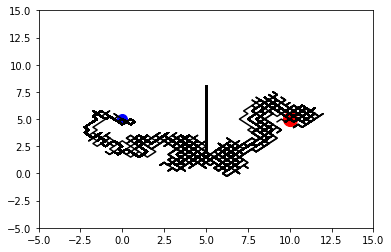

Gen: 149 | best fit: 0.545819714368591


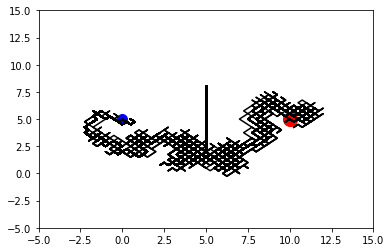

Gen: 150 | best fit: 0.545819714368591


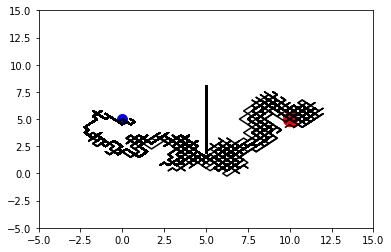

Gen: 151 | best fit: 0.545819714368591


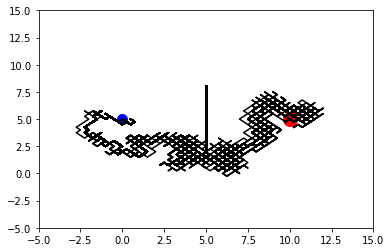

Gen: 152 | best fit: 0.545819714368591


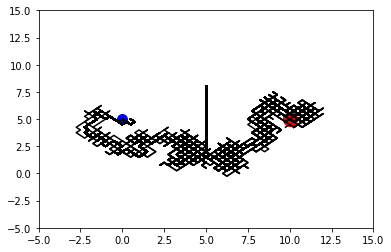

Gen: 153 | best fit: 0.545819714368591


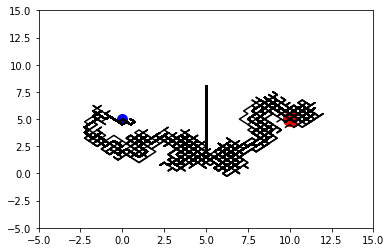

Gen: 154 | best fit: 0.545819714368591


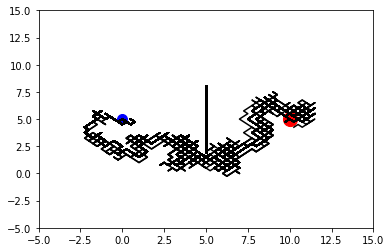

Gen: 155 | best fit: 0.545819714368591


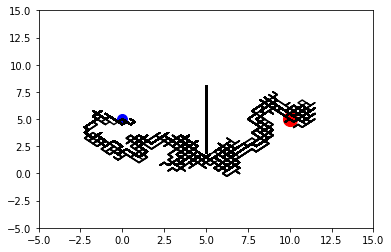

Gen: 156 | best fit: 0.545819714368591


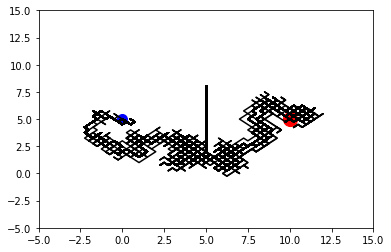

Gen: 157 | best fit: 0.545819714368591


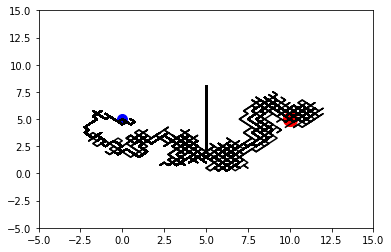

Gen: 158 | best fit: 0.545819714368591


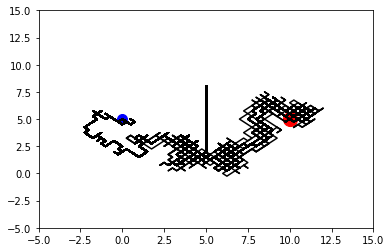

Gen: 159 | best fit: 0.545819714368591


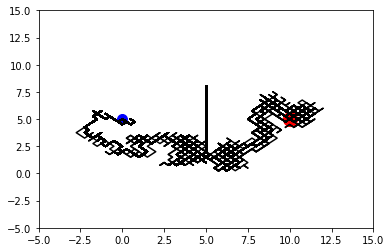

Gen: 160 | best fit: 0.545819714368591


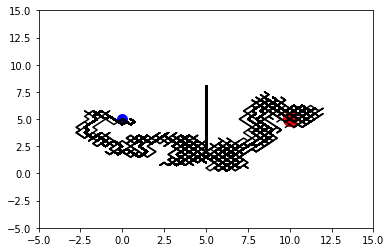

Gen: 161 | best fit: 0.545819714368591


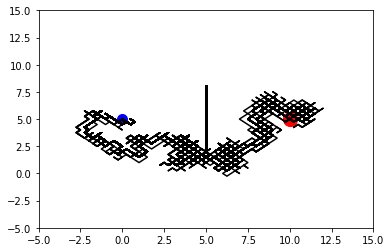

Gen: 162 | best fit: 0.545819714368591


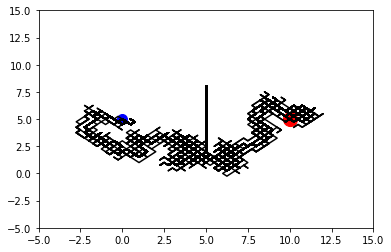

Gen: 163 | best fit: 0.545819714368591


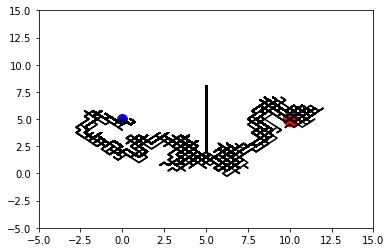

Gen: 164 | best fit: 0.545819714368591


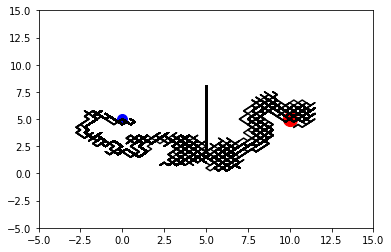

Gen: 165 | best fit: 0.545819714368591


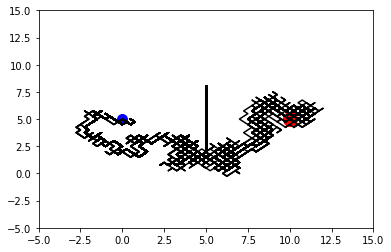

Gen: 166 | best fit: 0.545819714368591


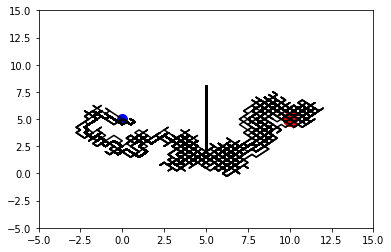

Gen: 167 | best fit: 0.545819714368591


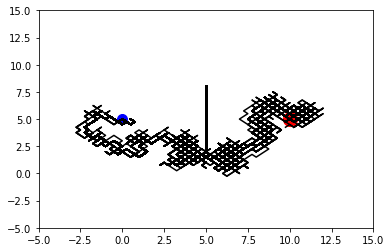

Gen: 168 | best fit: 0.545819714368591


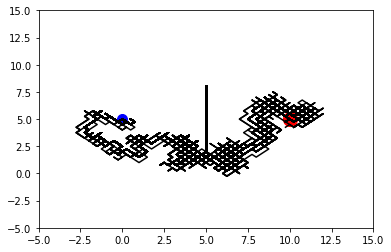

Gen: 169 | best fit: 0.545819714368591


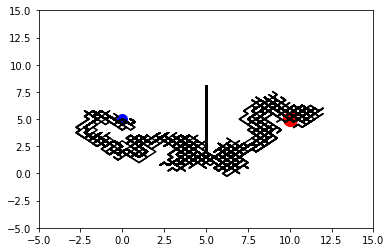

Gen: 170 | best fit: 0.545819714368591


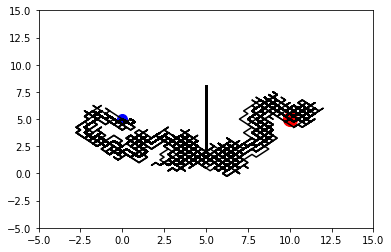

Gen: 171 | best fit: 0.545819714368591


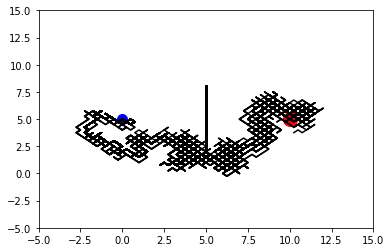

Gen: 172 | best fit: 0.545819714368591


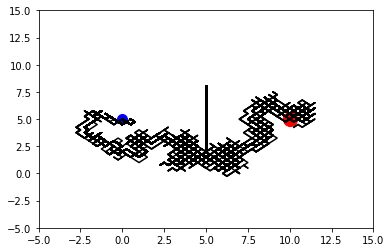

Gen: 173 | best fit: 0.545819714368591


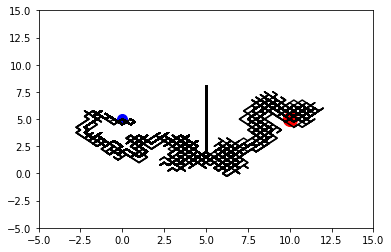

Gen: 174 | best fit: 0.545819714368591


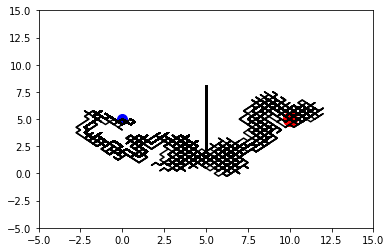

Gen: 175 | best fit: 0.545819714368591


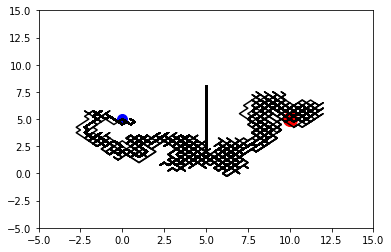

Gen: 176 | best fit: 0.545819714368591


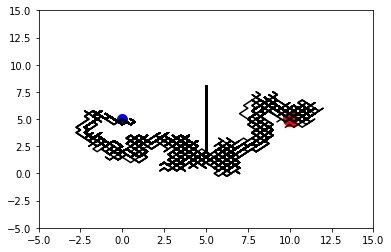

Gen: 177 | best fit: 0.545819714368591


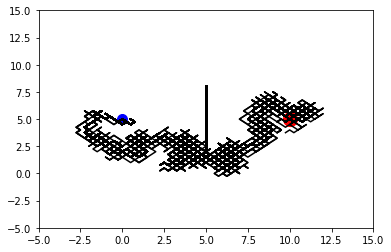

Gen: 178 | best fit: 0.545819714368591


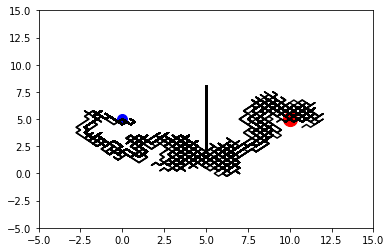

Gen: 179 | best fit: 0.545819714368591


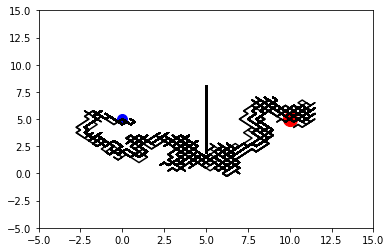

Gen: 180 | best fit: 0.545819714368591


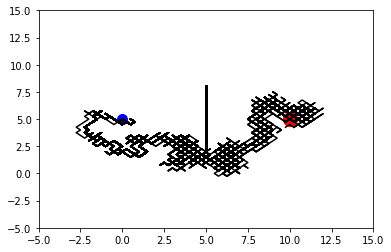

Gen: 181 | best fit: 0.545819714368591


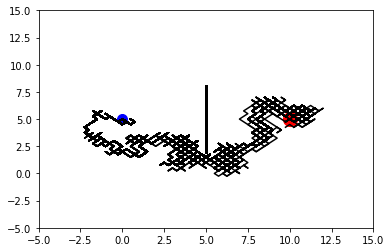

Gen: 182 | best fit: 0.545819714368591


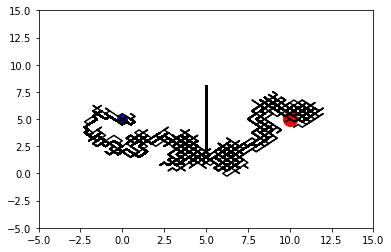

Gen: 183 | best fit: 0.545819714368591


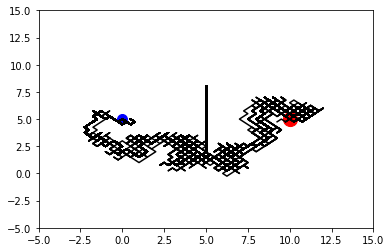

Gen: 184 | best fit: 0.545819714368591


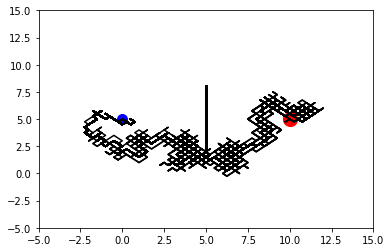

Gen: 185 | best fit: 0.545819714368591


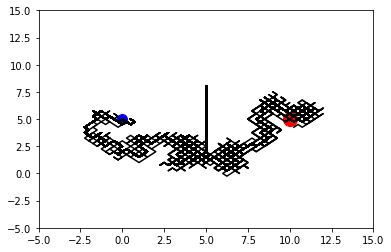

Gen: 186 | best fit: 0.545819714368591


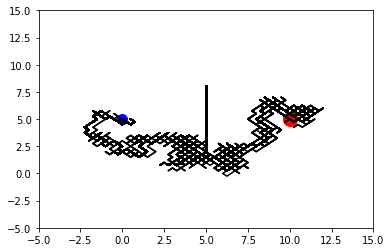

Gen: 187 | best fit: 0.545819714368591


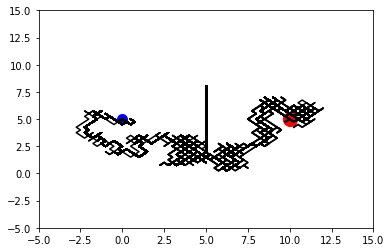

Gen: 188 | best fit: 0.545819714368591


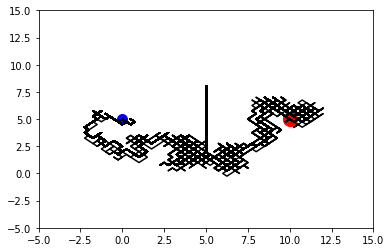

Gen: 189 | best fit: 0.545819714368591


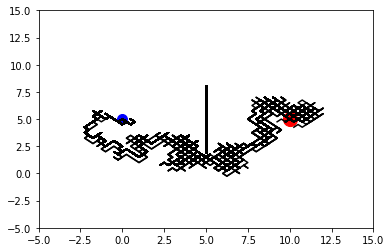

Gen: 190 | best fit: 0.545819714368591


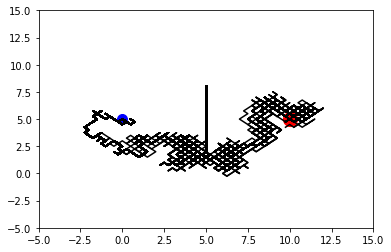

Gen: 191 | best fit: 0.545819714368591


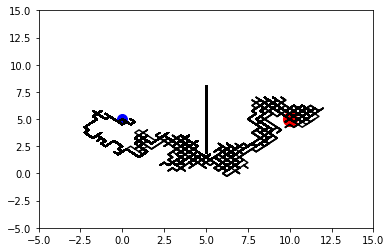

Gen: 192 | best fit: 0.545819714368591


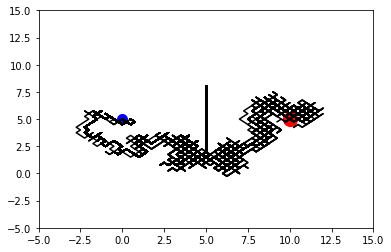

Gen: 193 | best fit: 0.545819714368591


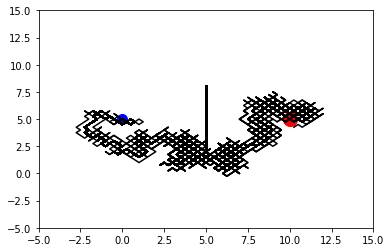

Gen: 194 | best fit: 0.545819714368591


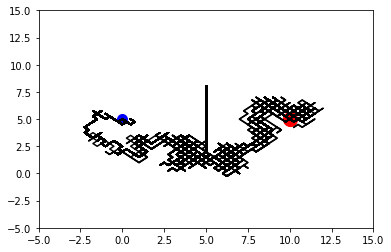

Gen: 195 | best fit: 0.545819714368591


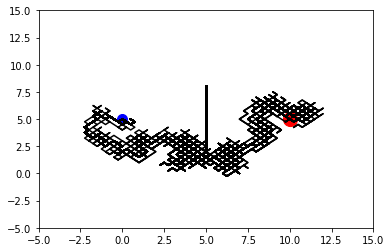

Gen: 196 | best fit: 0.545819714368591


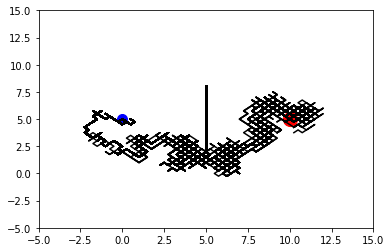

Gen: 197 | best fit: 0.545819714368591


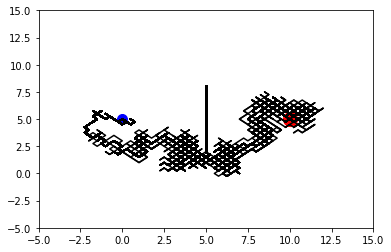

Gen: 198 | best fit: 0.545819714368591


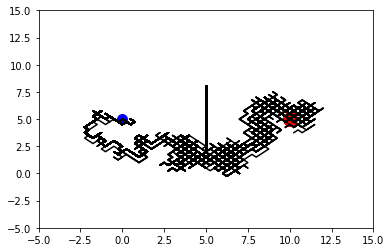

Gen: 199 | best fit: 0.545819714368591


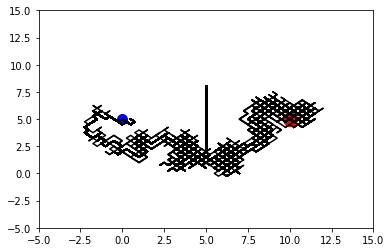

Gen: 200 | best fit: 0.545819714368591


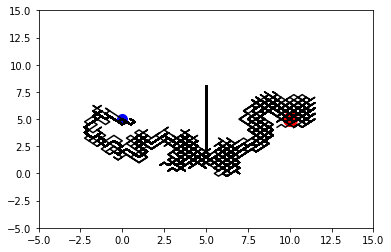

Gen: 201 | best fit: 0.545819714368591


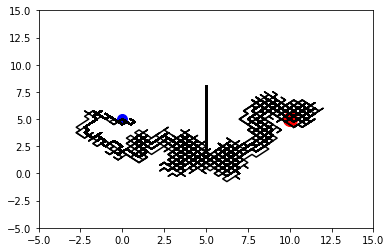

Gen: 202 | best fit: 0.545819714368591


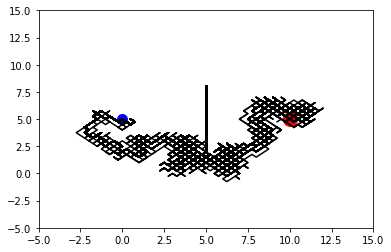

Gen: 203 | best fit: 0.545819714368591


Gen: 204 | best fit: 0.545819714368591


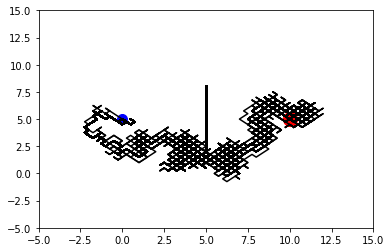

Gen: 205 | best fit: 0.545819714368591


Gen: 206 | best fit: 0.545819714368591


Gen: 207 | best fit: 0.545819714368591


Gen: 208 | best fit: 0.545819714368591


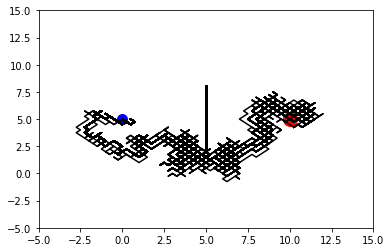

Gen: 209 | best fit: 0.545819714368591


Gen: 210 | best fit: 0.545819714368591


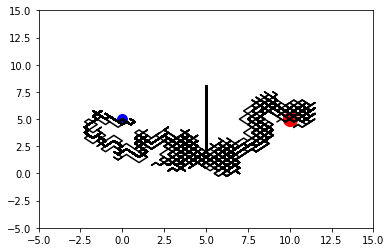

Gen: 211 | best fit: 0.545819714368591


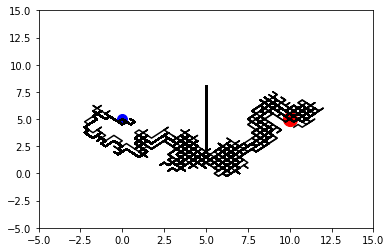

Gen: 212 | best fit: 0.545819714368591


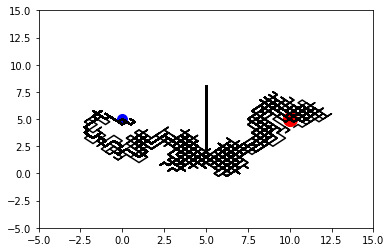

Gen: 213 | best fit: 0.545819714368591


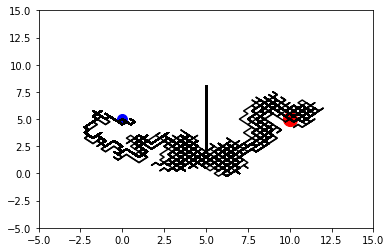

Gen: 214 | best fit: 0.545819714368591


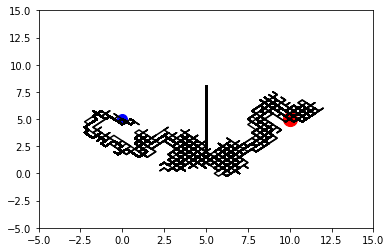

Gen: 215 | best fit: 0.545819714368591


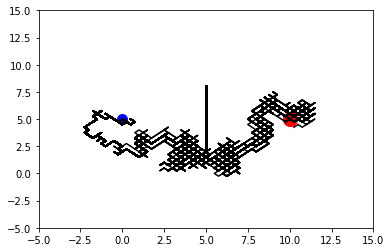

Gen: 216 | best fit: 0.545819714368591


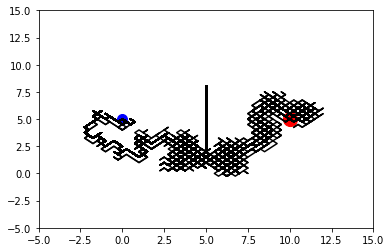

Gen: 217 | best fit: 0.545819714368591


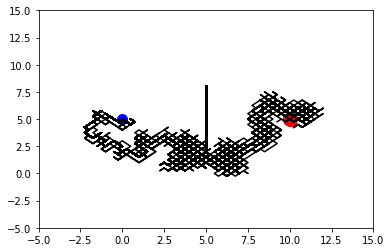

Gen: 218 | best fit: 0.545819714368591


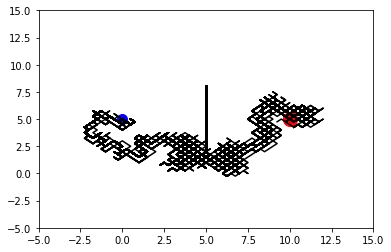

Gen: 219 | best fit: 0.545819714368591


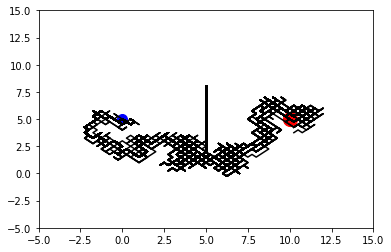

Gen: 220 | best fit: 0.545819714368591


Gen: 221 | best fit: 0.545819714368591


Gen: 222 | best fit: 0.545819714368591


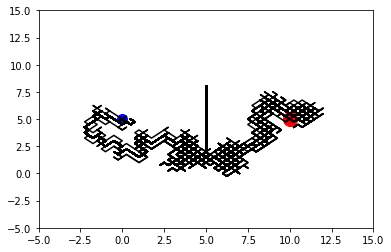

Gen: 223 | best fit: 0.545819714368591


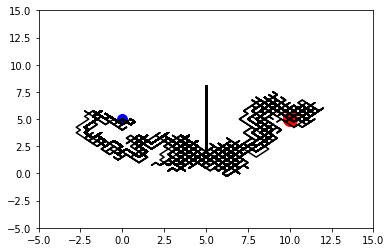

Gen: 224 | best fit: 0.545819714368591


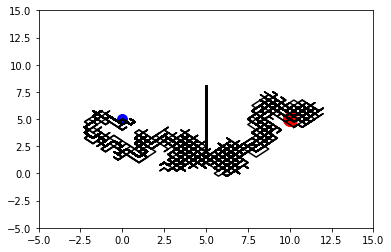

Gen: 225 | best fit: 0.545819714368591


Gen: 226 | best fit: 0.545819714368591


Gen: 227 | best fit: 0.545819714368591


Gen: 228 | best fit: 0.545819714368591


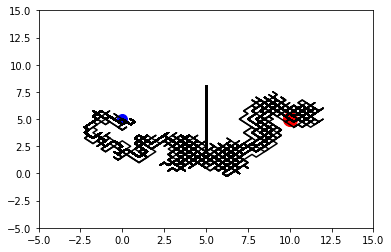

Gen: 229 | best fit: 0.545819714368591


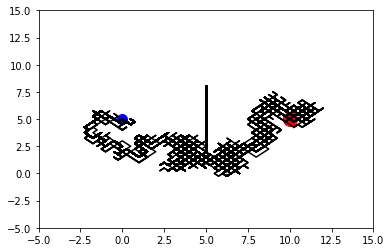

Gen: 230 | best fit: 0.545819714368591


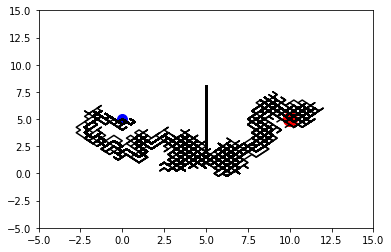

Gen: 231 | best fit: 0.545819714368591


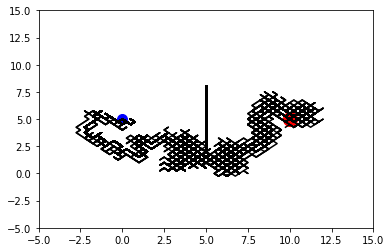

Gen: 232 | best fit: 0.545819714368591


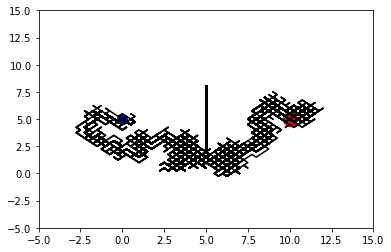

Gen: 233 | best fit: 0.545819714368591


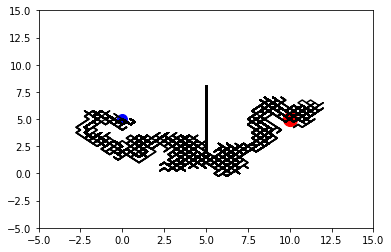

Gen: 234 | best fit: 0.545819714368591


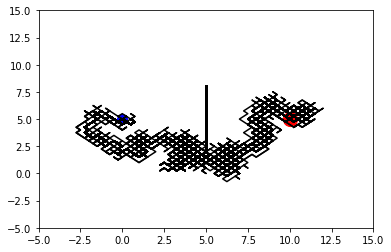

Gen: 235 | best fit: 0.545819714368591


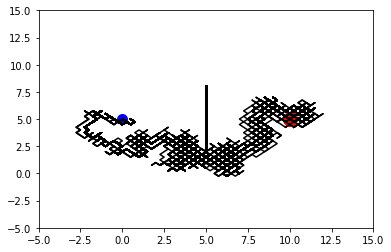

Gen: 236 | best fit: 0.545819714368591


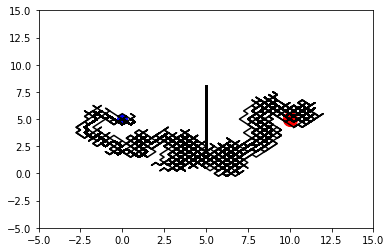

Gen: 237 | best fit: 0.545819714368591


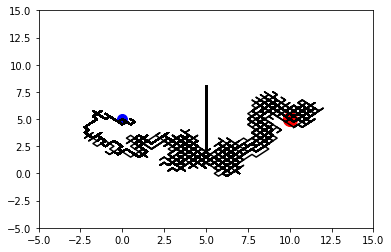

Gen: 238 | best fit: 0.545819714368591


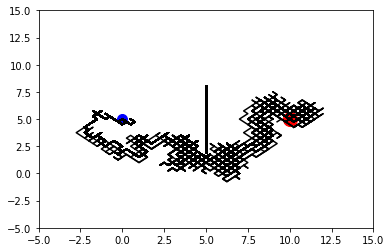

Gen: 239 | best fit: 0.545819714368591


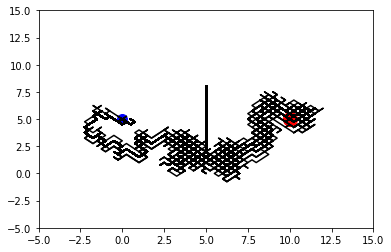

Gen: 240 | best fit: 0.545819714368591


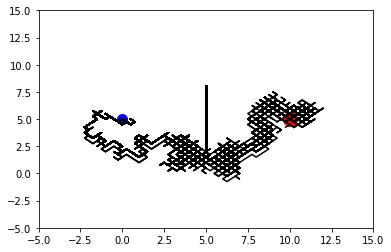

Gen: 241 | best fit: 0.545819714368591


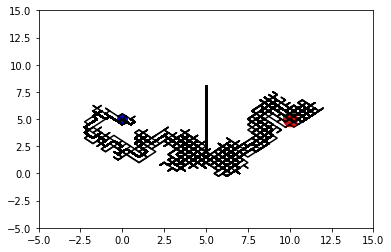

Gen: 242 | best fit: 0.545819714368591


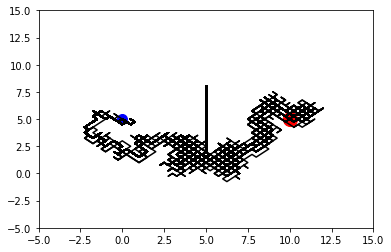

Gen: 243 | best fit: 0.545819714368591


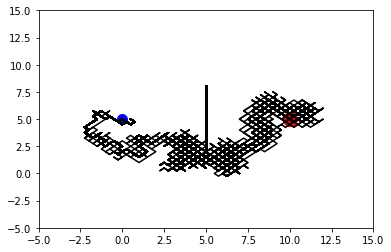

Gen: 244 | best fit: 0.545819714368591


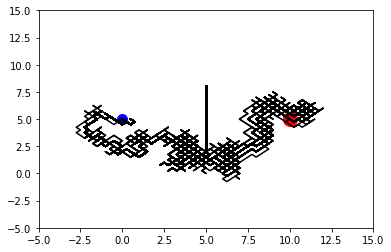

Gen: 245 | best fit: 0.545819714368591


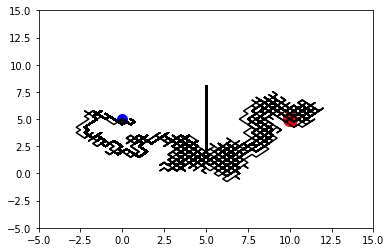

Gen: 246 | best fit: 0.545819714368591


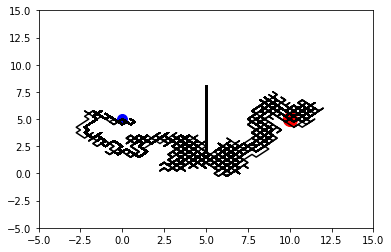

Gen: 247 | best fit: 0.545819714368591


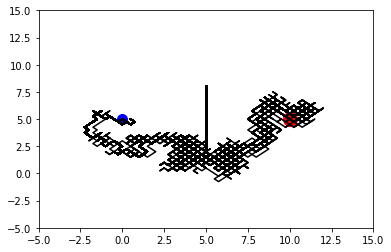

Gen: 248 | best fit: 0.545819714368591


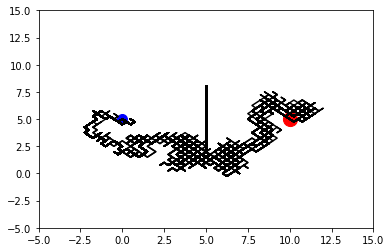

Gen: 249 | best fit: 0.545819714368591


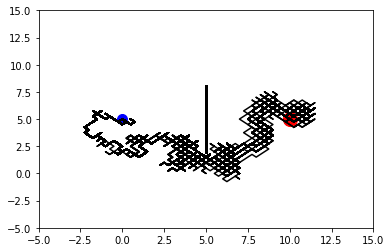

Gen: 250 | best fit: 0.545819714368591


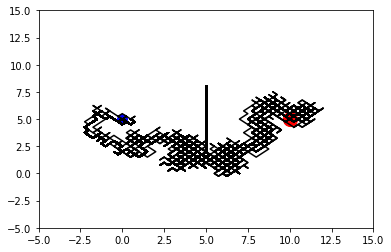

Gen: 251 | best fit: 0.545819714368591


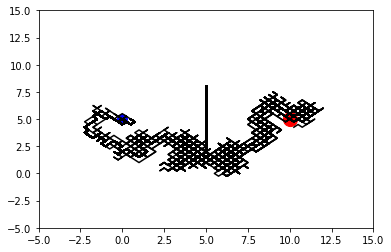

Gen: 252 | best fit: 0.545819714368591


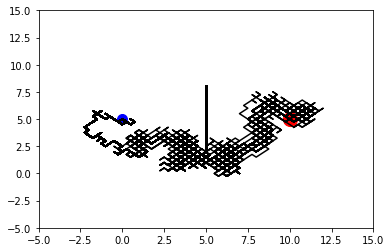

Gen: 253 | best fit: 0.545819714368591


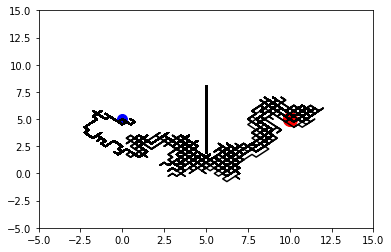

Gen: 254 | best fit: 0.545819714368591


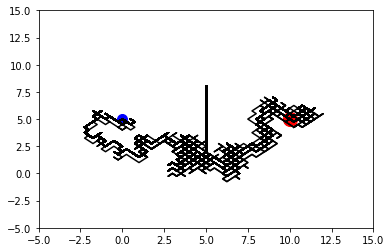

Gen: 255 | best fit: 0.545819714368591


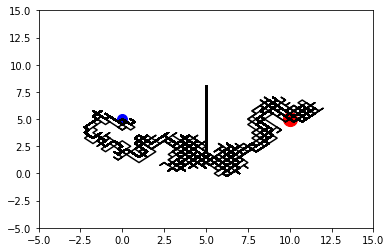

Gen: 256 | best fit: 0.545819714368591


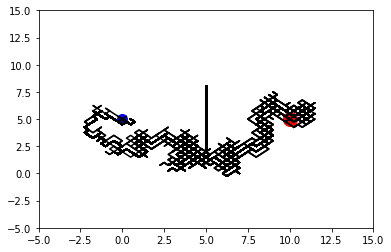

Gen: 257 | best fit: 0.545819714368591


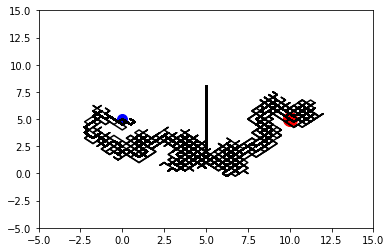

Gen: 258 | best fit: 0.545819714368591


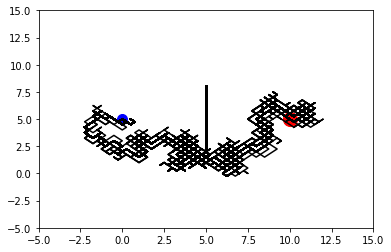

Gen: 259 | best fit: 0.545819714368591


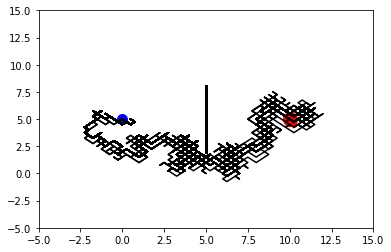

Gen: 260 | best fit: 0.545819714368591


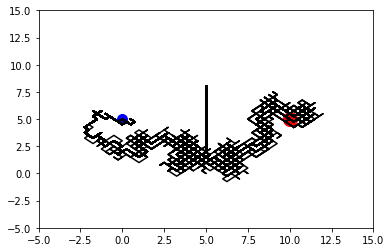

Gen: 261 | best fit: 0.545819714368591


Gen: 262 | best fit: 0.545819714368591


Gen: 263 | best fit: 0.545819714368591


Gen: 264 | best fit: 0.545819714368591


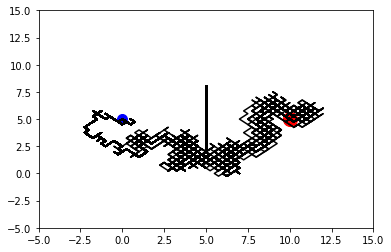

Gen: 265 | best fit: 0.545819714368591


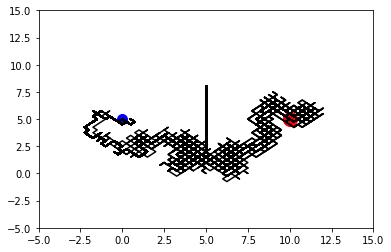

Gen: 266 | best fit: 0.545819714368591


Gen: 267 | best fit: 0.545819714368591


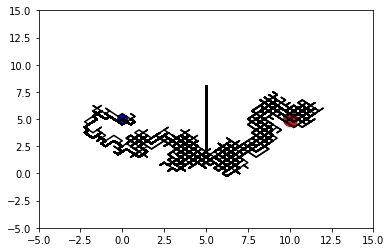

Gen: 268 | best fit: 0.545819714368591


Gen: 269 | best fit: 0.545819714368591


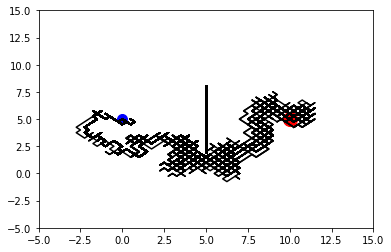

Gen: 270 | best fit: 0.545819714368591


Gen: 271 | best fit: 0.545819714368591


Gen: 272 | best fit: 0.545819714368591


Gen: 273 | best fit: 0.545819714368591


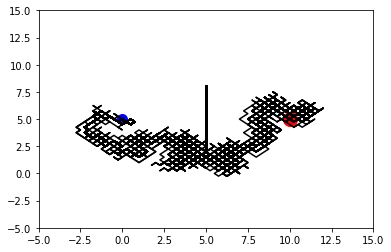

Gen: 274 | best fit: 0.545819714368591


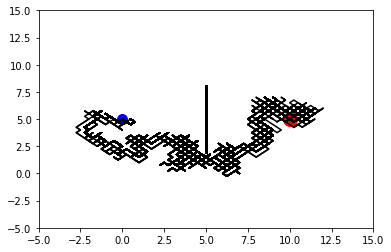

Gen: 275 | best fit: 0.545819714368591


Gen: 276 | best fit: 0.545819714368591


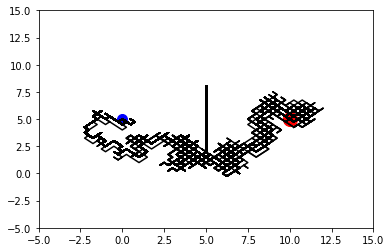

Gen: 277 | best fit: 0.545819714368591


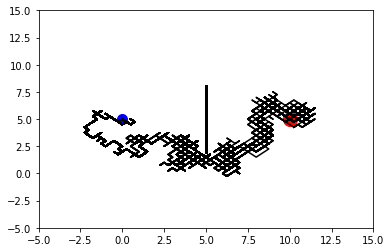

Gen: 278 | best fit: 0.545819714368591


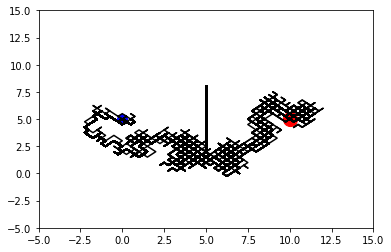

Gen: 279 | best fit: 0.545819714368591


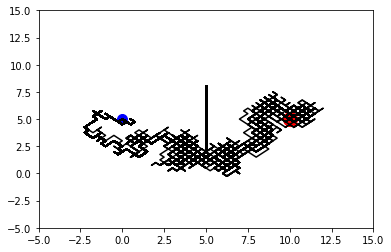

Gen: 280 | best fit: 0.545819714368591


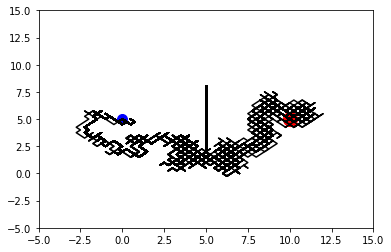

Gen: 281 | best fit: 0.545819714368591


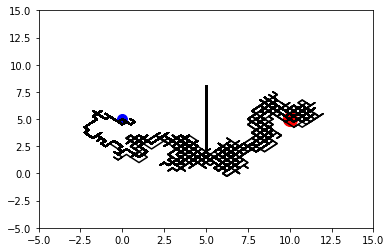

Gen: 282 | best fit: 0.545819714368591


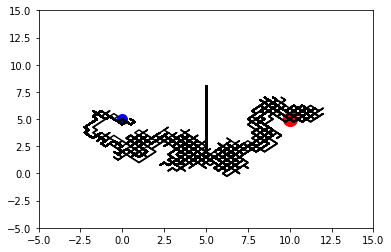

Gen: 283 | best fit: 0.545819714368591


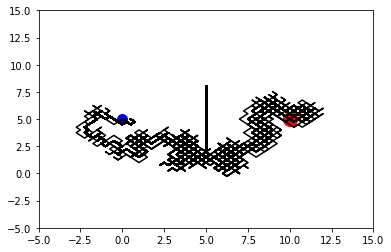

Gen: 284 | best fit: 0.545819714368591


Gen: 285 | best fit: 0.545819714368591


Gen: 286 | best fit: 0.545819714368591


Gen: 287 | best fit: 0.545819714368591


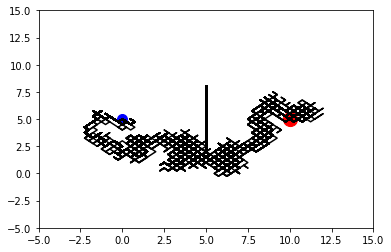

Gen: 288 | best fit: 0.545819714368591


Gen: 289 | best fit: 0.545819714368591


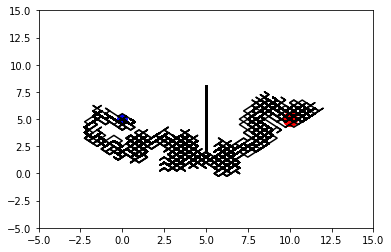

Gen: 290 | best fit: 0.545819714368591


Gen: 291 | best fit: 0.545819714368591


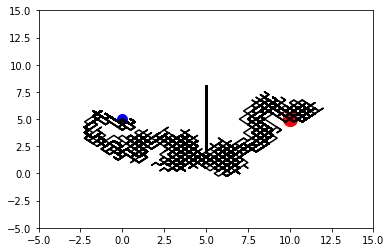

Gen: 292 | best fit: 0.545819714368591


Gen: 293 | best fit: 0.545819714368591


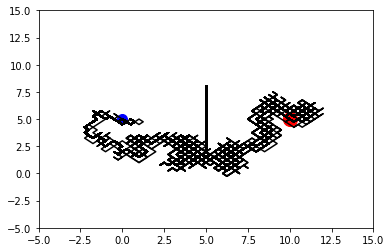

Gen: 294 | best fit: 0.545819714368591


Gen: 295 | best fit: 0.545819714368591


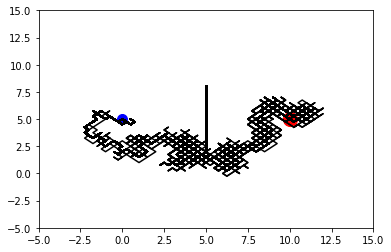

Gen: 296 | best fit: 0.545819714368591


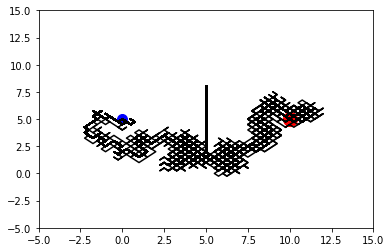

Gen: 297 | best fit: 0.545819714368591


Gen: 298 | best fit: 0.545819714368591


Gen: 299 | best fit: 0.545819714368591


In [8]:
%matplotlib inline
plt.ion()       # something about plotting
for generation in range(N_GENERATIONS):
    lx, ly = ga.DNA2product(ga.pop, N_MOVES, START_POINT)
    fitness = ga.get_fitness(lx, ly, GOAL_POINT, OBSTACLE_LINE)
    ga.evolve(fitness)
    print('Gen:', generation, '| best fit:', fitness.max())
    env.plotting(lx, ly)

plt.ioff()
plt.show()

## Done

In [9]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-27 13:49:51.501324
